<a href="https://colab.research.google.com/github/Suryanshu-Pugla/INDE-577--Data-Science-Machine-Learning/blob/main/Supervised%20Learning/Perceptron/Perceptron_social_ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
data = pd.read_csv("Social_Network_Ads.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000


In [ ]:
# Select features and target
# Assuming 'Age' and 'EstimatedSalary' are features, and 'Purchased' is the target
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert target variable to NumPy array and ensure integer type
y = y.values  # Convert to NumPy array
y = y.astype(int)  # Ensure integer type


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)


Training Set Size: (320, 2)
Testing Set Size: (80, 2)


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                # Calculate linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Apply step activation function
                y_pred = 1 if linear_output > 0 else 0
                # Update weights and bias
                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output > 0, 1, 0)

# Initialize and train the perceptron model
perceptron = Perceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)


Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.79      0.85      0.81        52
           1       0.67      0.57      0.62        28

    accuracy                           0.75        80
   macro avg       0.73      0.71      0.72        80
weighted avg       0.74      0.75      0.75        80



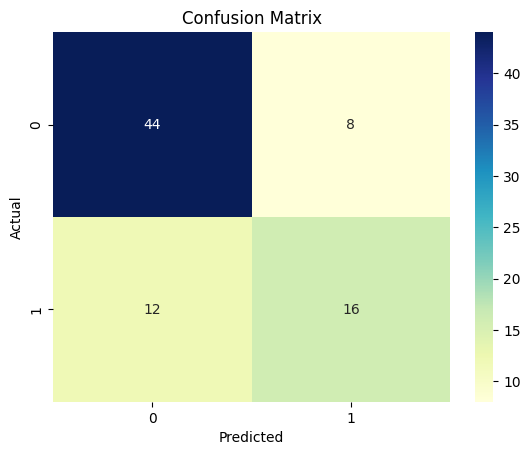

In [ ]:
# Predict on the test set
y_pred = perceptron.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


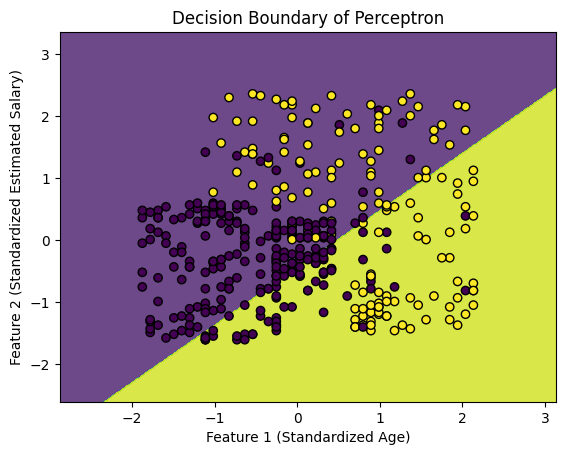

In [ ]:
# Plot decision boundary (for 2 features)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Decision Boundary of Perceptron")
plt.xlabel("Feature 1 (Standardized Age)")
plt.ylabel("Feature 2 (Standardized Estimated Salary)")
plt.show()
